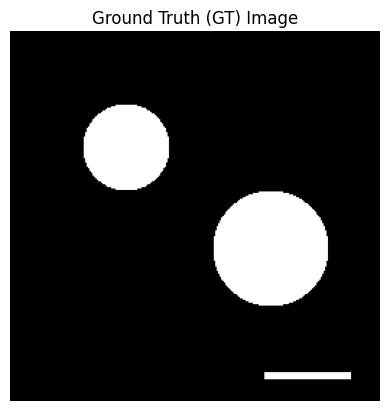

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.draw import disk

size = 256
gt = np.zeros((size, size))
rr, cc = disk((80, 80), 30)
gt[rr, cc] = 1
rr, cc = disk((150, 180), 40)
gt[rr, cc] = 1


gt[-20:-15, -80:-20] = 1

plt.imshow(gt, cmap='gray')
plt.title("Ground Truth (GT) Image")
plt.axis("off")
plt.show()


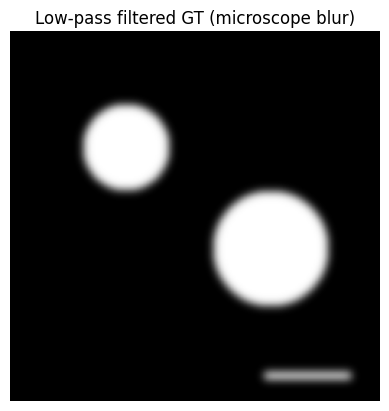

In [2]:
low_passed = gaussian_filter(gt, sigma=3)

plt.imshow(low_passed, cmap='gray')
plt.title("Low-pass filtered GT (microscope blur)")
plt.axis("off")
plt.show()


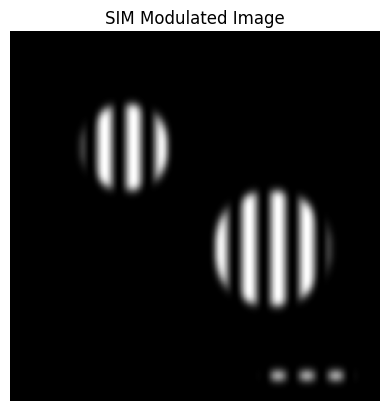

In [3]:

x = np.arange(size)
y = np.arange(size)
X, Y = np.meshgrid(x, y)
pattern = 0.5 * (1 + np.sin(2 * np.pi * X / 20))


modulated = low_passed * pattern

plt.imshow(modulated, cmap='gray')
plt.title("SIM Modulated Image")
plt.axis("off")
plt.show()


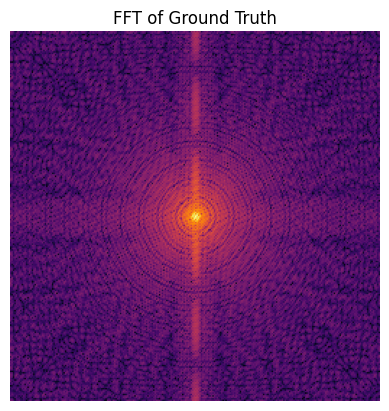

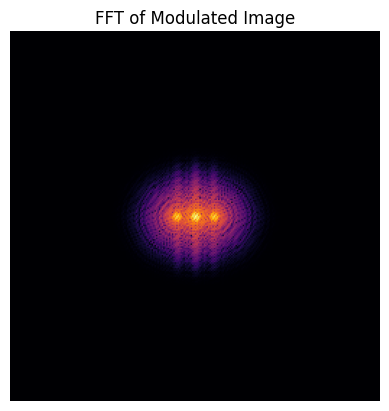

In [4]:
def show_fft(img, title):
    f = np.fft.fftshift(np.fft.fft2(img))
    magnitude = np.log1p(np.abs(f))
    plt.imshow(magnitude, cmap='inferno')
    plt.title(title)
    plt.axis("off")
    plt.show()

show_fft(gt, "FFT of Ground Truth")
show_fft(modulated, "FFT of Modulated Image")


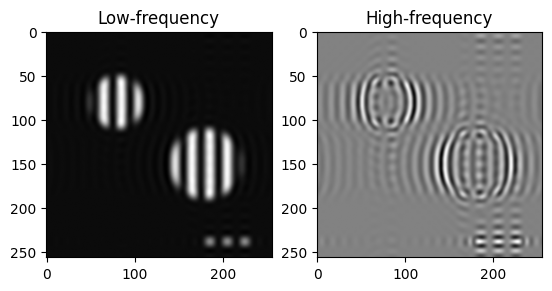

In [5]:

f_mod = np.fft.fftshift(np.fft.fft2(modulated))
rows, cols = f_mod.shape
crow, ccol = rows//2, cols//2


mask = np.zeros_like(f_mod)
mask[crow-20:crow+20, ccol-20:ccol+20] = 1
low_freq = np.fft.ifft2(np.fft.ifftshift(f_mod * mask)).real


high_freq = modulated - low_freq

plt.subplot(1,2,1)
plt.imshow(low_freq, cmap='gray')
plt.title("Low-frequency")

plt.subplot(1,2,2)
plt.imshow(high_freq, cmap='gray')
plt.title("High-frequency")
plt.show()


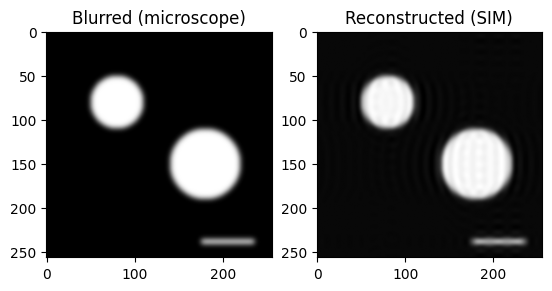

In [6]:
reconstructed = low_passed + high_freq

plt.subplot(1,2,1)
plt.imshow(low_passed, cmap='gray')
plt.title("Blurred (microscope)")

plt.subplot(1,2,2)
plt.imshow(reconstructed, cmap='gray')
plt.title("Reconstructed (SIM)")
plt.show()


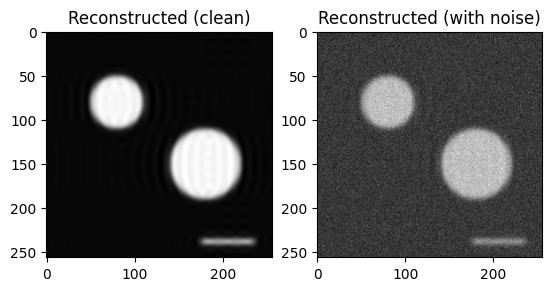

In [7]:

noisy = reconstructed + 0.1 * np.random.normal(size=reconstructed.shape)


plt.subplot(1,2,1)
plt.imshow(reconstructed, cmap='gray')
plt.title("Reconstructed (clean)")

plt.subplot(1,2,2)
plt.imshow(noisy, cmap='gray')
plt.title("Reconstructed (with noise)")
plt.show()



noisy = reconstructed + 0.1 * np.random.normal(size=reconstructed.shape)
noisy_poisson = np.random.poisson(reconstructed * 20) / 20.0  # scale factor adjusts intensity

plt.subplot(1,2,1)
plt.imshow(reconstructed, cmap='gray')
plt.title("Reconstructed (clean)")

plt.subplot(1,2,2)
plt.imshow(noisy, cmap='gray')
plt.title("Reconstructed (with noise)")
plt.show()
